In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_table('data.csv', sep=';', index_col=0, decimal=',')
df.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.366667,24.400000,41.033333,NaN,0.456460,...,0.12,2.6,NaN,NaN,53.4,1.0,5.8,0.15,2.6,NaN
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.066667,13.866667,44.066667,NaN,0.359285,...,0.14,2.2,NaN,NaN,59.3,0.6,4.1,0.11,2.3,NaN
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.350000,17.950000,43.350000,NaN,0.331665,...,0.12,2.6,NaN,NaN,57.2,0.5,8.1,0.13,2.3,NaN
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.183333,19.816667,46.183333,NaN,0.377945,...,0.11,2.4,NaN,NaN,60.3,0.5,6.3,0.12,2.6,NaN
4,г683863<889,2070-06-21 03:50:00,Э76ХФ,Р65,20.0,48.500000,17.033333,48.500000,NaN,0.389875,...,0.12,2.4,NaN,NaN,60.3,0.6,4.5,0.09,2.5,NaN


In [3]:
df.shape # 7041 наблюдения, 84 колонки

(7041, 84)

In [4]:
df = df[df['t вып-обр'].notna()] # удаляем пустые строки

In [5]:
df.shape

(6444, 84)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6444 entries, 0 to 7040
Data columns (total 84 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   nplv                            6444 non-null   object 
 1   DT                              6444 non-null   object 
 2   МАРКА                           6444 non-null   object 
 3   ПРОФИЛЬ                         6444 non-null   object 
 4   t вып-обр                       6444 non-null   float64
 5   t обработка                     6440 non-null   float64
 6   t под током                     6440 non-null   float64
 7   t продувка                      6444 non-null   float64
 8   ПСН гр.                         5249 non-null   float64
 9   чист расход C                   6435 non-null   float64
 10  чист расход Cr                  5883 non-null   float64
 11  чист расход Mn                  6431 non-null   float64
 12  чист расход Si                  64

In [7]:
df['произв количество обработок'].value_counts()

1.0    6391
2.0      48
3.0       5
Name: произв количество обработок, dtype: int64

In [8]:
df['ПРОФИЛЬ'].value_counts() # физически не связано с составом

Р65                                 5867
ОР65                                 217
60E1                                  94
UIC54                                 52
Рельсы трамвайные                     49
Р50                                   44
Шар заг d шара 80-100 мм 2,3 гр.      44
136 RE                                17
Шар заг d шара 80-100 мм 4 гр.        17
Шары мелющие d 80-100 мм              14
54E1                                   9
НЕТ                                    7
ОР50                                   6
Швеллер 40У                            4
Шар заг d шара 100 мм 2 гр.            2
Швеллер 40У (12 категория)             1
Name: ПРОФИЛЬ, dtype: int64

In [9]:
df['МАРКА'].value_counts()

Э76ХФ     4432
Э90ХАФ    1346
Э73Ф       223
Э76Ф        85
R350HT      53
900А        52
Э76ХАФ      50
Э76         49
Ш2.2        44
G2HH        34
R260        33
Ш2Л         31
НХ           7
С345         2
09Г2С        1
С355         1
С255         1
Name: МАРКА, dtype: int64

Удаляем колонки 'nplv', 'DT', 'ПРОФИЛЬ'

In [10]:
df.drop(['nplv', 'DT', 'ПРОФИЛЬ', 'произв количество обработок'], axis=1, inplace=True)
df.shape

(6444, 80)

In [11]:
num_of_na = df.isna().sum(axis=0)

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(num_of_na / df.shape[0] * 100)

МАРКА                              0.000000
t вып-обр                          0.000000
t обработка                        0.062073
t под током                        0.062073
t продувка                         0.000000
ПСН гр.                           18.544382
чист расход C                      0.139665
чист расход Cr                     8.705773
чист расход Mn                     0.201738
чист расход Si                     0.201738
чист расход V                      4.127871
температура первая                 0.124146
температура последняя              0.124146
Ar (интенс.)                       0.279330
N2 (интенс.)                      78.445065
эл. энергия (интенс.)              0.062073
произв жидкая сталь                0.000000
произв  количество плавок          0.000000
произв количество плавок (цел)     0.000000
расход газ Ar                      0.279330
расход газ  N2                    78.445065
расход C пров.                    88.764742
сыпуч известь РП                

В некоторых столбцах таргета осталось одинаковое количество пропусков, проверим везде ли они пропадут

In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df[df['химшлак последний SiO2'].notna()].isna().sum(axis=0))

МАРКА                                0
t вып-обр                            0
t обработка                          3
t под током                          2
t продувка                           0
ПСН гр.                            948
чист расход C                        6
чист расход Cr                     418
чист расход Mn                       8
чист расход Si                       8
чист расход V                      175
температура первая                   6
температура последняя                6
Ar (интенс.)                         7
N2 (интенс.)                      3716
эл. энергия (интенс.)                2
произв жидкая сталь                  0
произв  количество плавок            0
произв количество плавок (цел)       0
расход газ Ar                        7
расход газ  N2                    3716
расход C пров.                    4151
сыпуч известь РП                   978
сыпуч кварцит                     4737
сыпуч кокс пыль УСТК                10
сыпуч  кокс. мелочь (сух.

да, теперь таргет почти чист, остался только один пропуск, скипнем его тоже

In [14]:
df = df[df['химшлак последний SiO2'].notna()]

In [15]:
df = df[df['химшлак последний MgO'].notna()]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4741 entries, 463 to 7040
Data columns (total 80 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   МАРКА                           4741 non-null   object 
 1   t вып-обр                       4741 non-null   float64
 2   t обработка                     4738 non-null   float64
 3   t под током                     4739 non-null   float64
 4   t продувка                      4741 non-null   float64
 5   ПСН гр.                         3793 non-null   float64
 6   чист расход C                   4735 non-null   float64
 7   чист расход Cr                  4323 non-null   float64
 8   чист расход Mn                  4733 non-null   float64
 9   чист расход Si                  4733 non-null   float64
 10  чист расход V                   4566 non-null   float64
 11  температура первая              4735 non-null   float64
 12  температура последняя           

Выкинем фичи с огромным количеством пропусков

In [17]:
many_nans = ['сыпуч кварцит', 'расход C пров.', 'сыпуч  кокс. мелочь (сух.)', 'ферспл FeMo', 'ферспл FeSi-75',
'ферспл FeV азот.', 'ферспл  Ni H1 пласт.']
df.drop(many_nans, axis=1, inplace=True)

In [18]:
df.shape

(4741, 73)

Избавились от 11 фичей. Посмотрим на матрицу ковариации и найдём сильно кореллирующие переменные

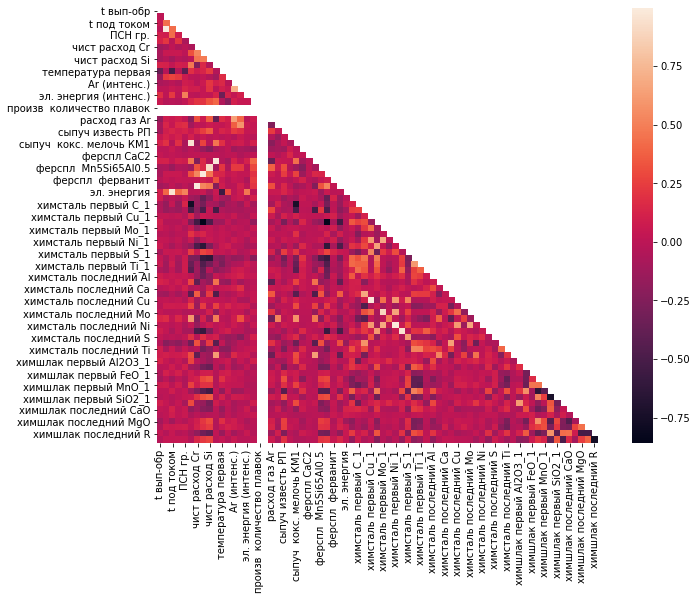

In [19]:
corr_matrix = df.corr('spearman')
diag_mask = np.triu(corr_matrix)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, mask=diag_mask);

In [20]:
df[['произв  количество плавок', 'произв количество плавок (цел)']].describe()

,произв количество плавок,произв количество плавок (цел)
count,4741.0,4741.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


In [21]:
df.drop(['произв  количество плавок', 'произв количество плавок (цел)'], axis=1, inplace=True); # всегда 1

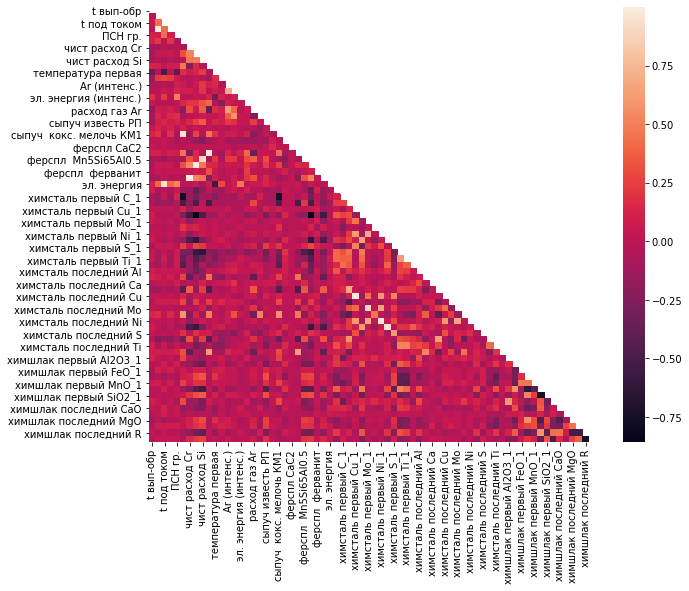

In [22]:
corr_matrix = df.corr('spearman')
diag_mask = np.triu(corr_matrix)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, mask=diag_mask);

сильно коррелирующие пары

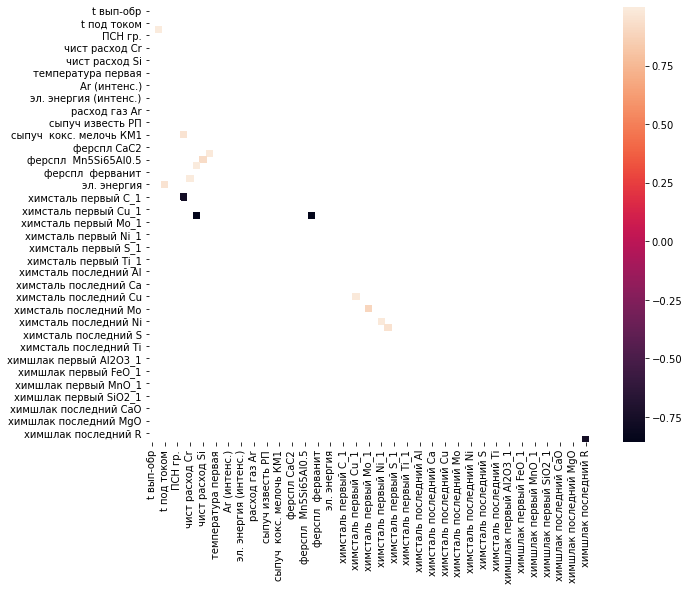

In [23]:
corr_matrix = corr_matrix[np.abs(corr_matrix) > 0.75]
diag_mask = np.triu(corr_matrix)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, mask=diag_mask);

15 пар, посмотрим на их зависимости друг от друга

In [24]:
good_corr = (np.abs(corr_matrix) > 0.75).reset_index().melt(id_vars='index').query('value == True')
good_corr = good_corr[~(good_corr['index'] == good_corr['variable'])]
good_corr = good_corr.reset_index().drop(['level_0'], axis=1)

1
t продувка
Ненулевые значения: 4741 / 4741

t обработка
Ненулевые значения: 4738 / 4741


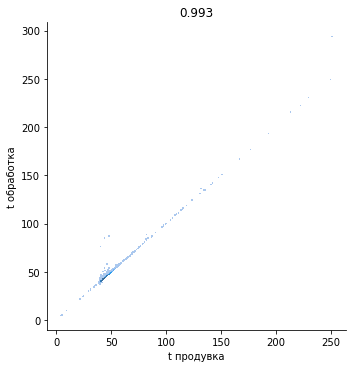

________________________
2
эл. энергия
Ненулевые значения: 4739 / 4741

t под током
Ненулевые значения: 4739 / 4741


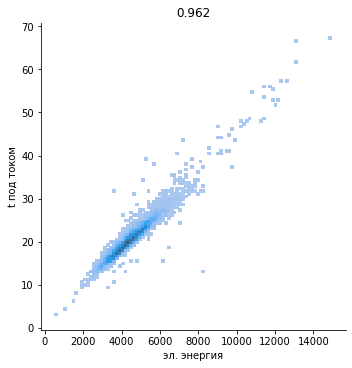

________________________
3
сыпуч  кокс. мелочь КМ1
Ненулевые значения: 4660 / 4741

чист расход C
Ненулевые значения: 4735 / 4741


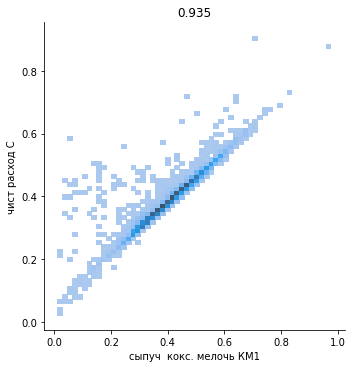

________________________
4
химсталь первый C_1
Ненулевые значения: 4741 / 4741

чист расход C
Ненулевые значения: 4735 / 4741


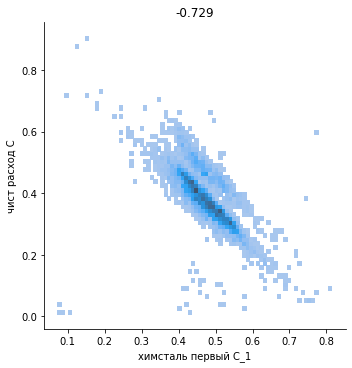

________________________
5
ферспл  фх850А
Ненулевые значения: 4323 / 4741

чист расход Cr
Ненулевые значения: 4323 / 4741


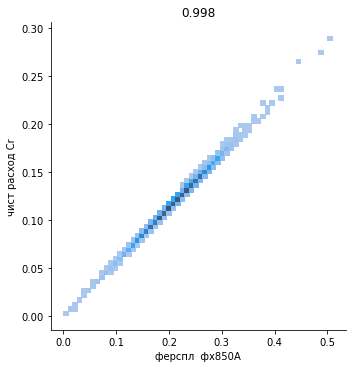

________________________
6
ферспл SiMn18
Ненулевые значения: 4706 / 4741

чист расход Mn
Ненулевые значения: 4733 / 4741


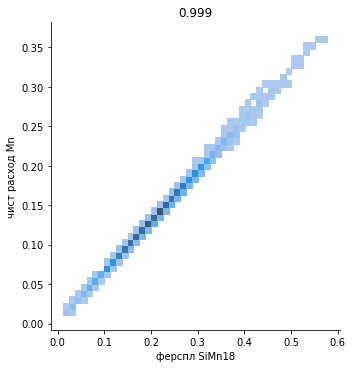

________________________
7
химсталь первый Mn_1
Ненулевые значения: 4741 / 4741

чист расход Mn
Ненулевые значения: 4733 / 4741


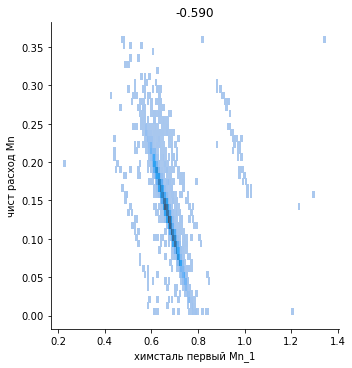

________________________
8
ферспл  Mn5Si65Al0.5
Ненулевые значения: 4712 / 4741

чист расход Si
Ненулевые значения: 4733 / 4741


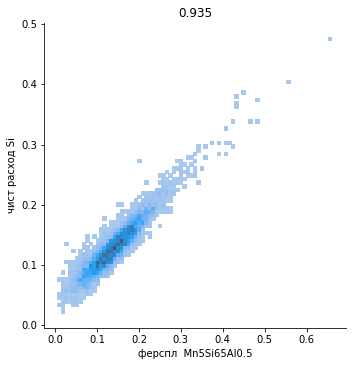

________________________
9
ферспл  FeV-80
Ненулевые значения: 4567 / 4741

чист расход V
Ненулевые значения: 4566 / 4741


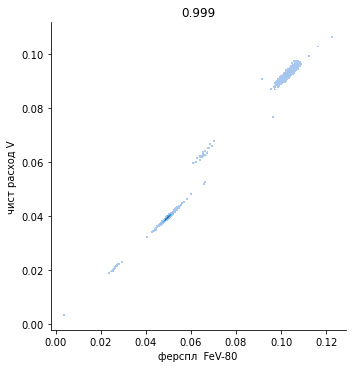

________________________
10
химсталь первый Mn_1
Ненулевые значения: 4741 / 4741

ферспл SiMn18
Ненулевые значения: 4706 / 4741


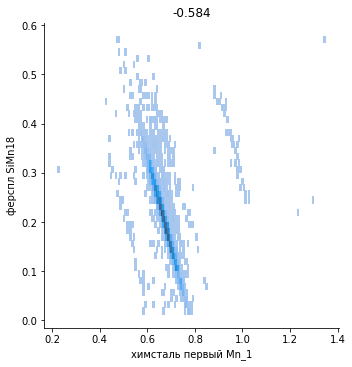

________________________
11
химсталь последний Cu
Ненулевые значения: 4741 / 4741

химсталь первый Cu_1
Ненулевые значения: 4741 / 4741


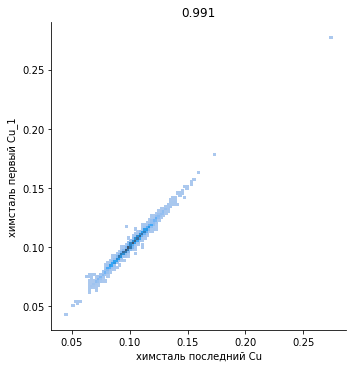

________________________
12
химсталь последний Mo
Ненулевые значения: 4741 / 4741

химсталь первый Mo_1
Ненулевые значения: 4740 / 4741


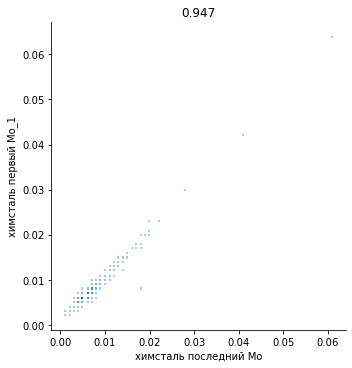

________________________
13
химсталь последний Ni
Ненулевые значения: 4741 / 4741

химсталь первый Ni_1
Ненулевые значения: 4741 / 4741


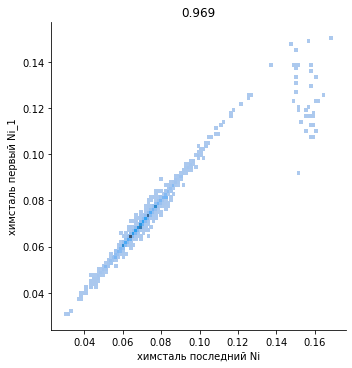

________________________
14
химсталь последний P
Ненулевые значения: 4741 / 4741

химсталь первый P_1
Ненулевые значения: 4741 / 4741


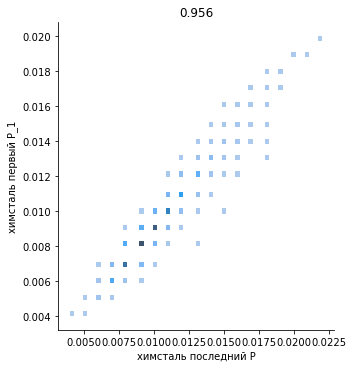

________________________
15
химшлак последний SiO2
Ненулевые значения: 4741 / 4741

химшлак последний R
Ненулевые значения: 4741 / 4741


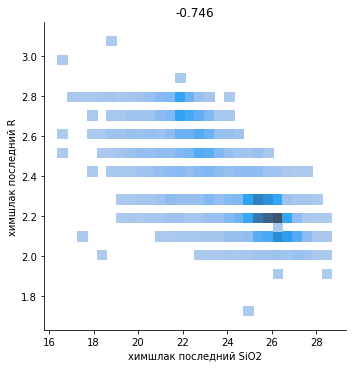

________________________


In [25]:
col_list = []
counter = 0
for i, val in good_corr.iterrows():
    if set([val[0], val[1]]) not in col_list:
        counter += 1
        print(counter)
        col_list.append(set([val[0], val[1]]))
        print(val[0])
        print('Ненулевые значения:', df[val[0]].notna().sum(), '/', df.shape[0])
        print()
        print(val[1])
        print('Ненулевые значения:', df[val[1]].notna().sum(), '/', df.shape[0])
        sns.displot(x=df[val[0]], y=df[val[1]]);
        plt.title(f'{df[[val[0], val[1]]].corr().iloc[0, 1]:.3f}')
        plt.show();
        print('________________________')

Возьмём все пары с ковариацией 0.99..
1
t продувка
Ненулевые значения: 4741 / 4741
t обработка
Ненулевые значения: 4738 / 4741

удалим 't обработка'

---
5
ферспл  фх850А
Ненулевые значения: 4323 / 4741

чист расход Cr
Ненулевые значения: 4323 / 4741

удалим 'ферспл  фх850А'

---
6
ферспл SiMn18
Ненулевые значения: 4706 / 4741

чист расход Mn
Ненулевые значения: 4733 / 4741

удалим 'ферспл SiMn18'

---

9
ферспл  FeV-80
Ненулевые значения: 4567 / 4741

чист расход V
Ненулевые значения: 4566 / 4741

тут не уверен (см график), нужно посмотреть на них внимательнее

---
11
химсталь последний Cu
Ненулевые значения: 4741 / 4741

химсталь первый Cu_1
Ненулевые значения: 4741 / 4741

удалим 'химсталь первый Cu_1'

---

Точно минус 4 столбца


In [26]:
drop_list = ['t обработка', 'ферспл  фх850А', 'ферспл SiMn18', 'химсталь первый Cu_1']
df.drop(drop_list, axis=1, inplace=True)
df.shape

(4741, 67)

смотрим на 'ферспл  FeV-80' и 'чист расход V'

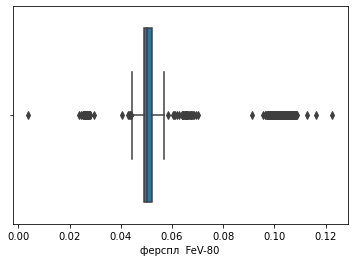

In [27]:
sns.boxplot(df['ферспл  FeV-80']);

<AxesSubplot:xlabel='чист расход V'>

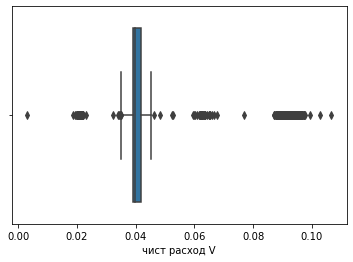

In [28]:
sns.boxplot(df['чист расход V'])

array([[<AxesSubplot:title={'center':'ферспл  FeV-80'}>,
        <AxesSubplot:title={'center':'чист расход V'}>]], dtype=object)

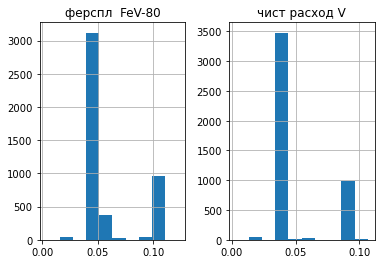

In [29]:
df[['ферспл  FeV-80', 'чист расход V']].hist()

выделим таргет и посмотрим на его ковариацию

In [30]:
target = [col for col in df.columns if col.startswith('химшлак последний')]

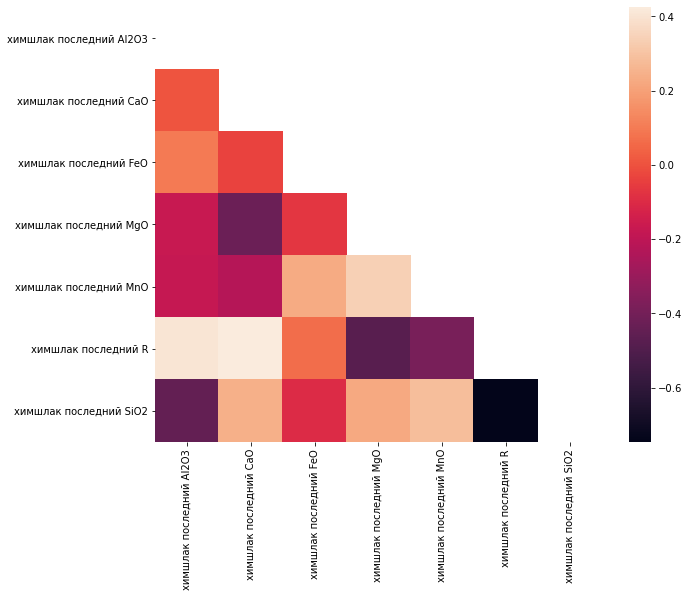

In [31]:
corr_matrix = df[target].corr()
diag_mask = np.triu(corr_matrix)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, mask=diag_mask);

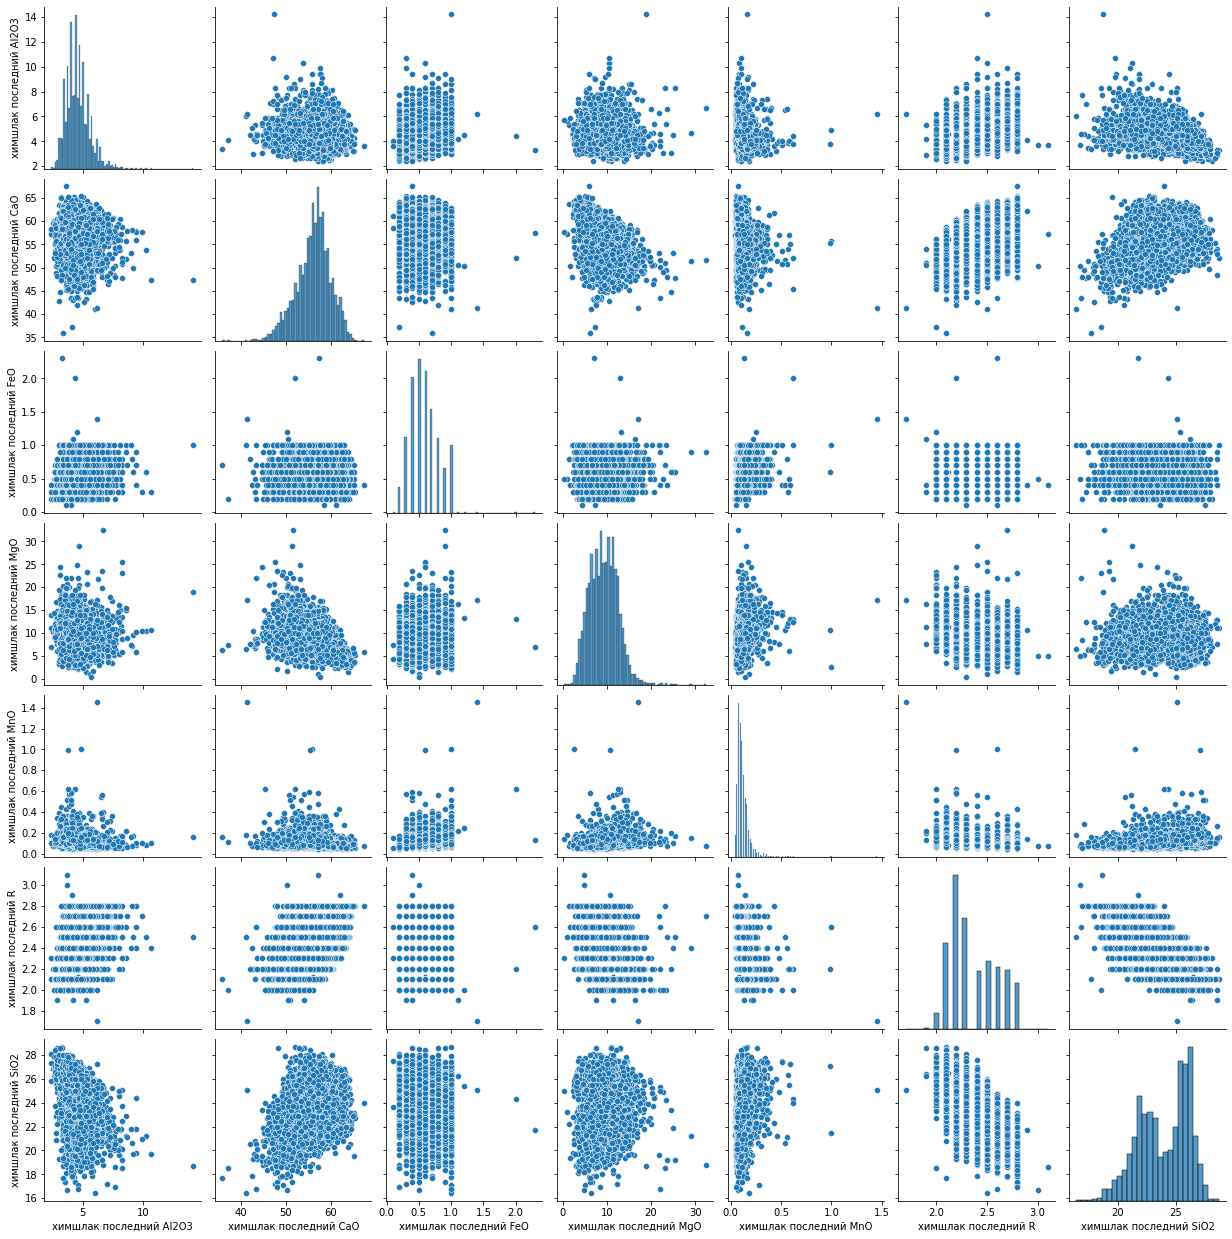

In [32]:
sns.pairplot(df[target])

In [34]:
df.shape

(4741, 67)